## How do i find if my data is normally distributed ?
---> You can call the sns.distplot.<br>
<br>
---> Skew function in pandas ( If <mark>pd.skew() == 0</mark>, then perfect. If negetive or positive then the data is skewed.)<br>
<br>
---> Q Q Plot 

## Problems with Skewed Data in Model Training
==============================================

### Key Problems Caused by Skewed Data
------------------------------------

#### Poor Generalization (Bias Towards Majority Class)

* The model may ignore the minority class as optimizing accuracy favors predicting the majority class
* Example: In fraud detection, a model might classify everything as "not fraud" and still achieve high accuracy

#### Misleading Evaluation Metrics

* Accuracy becomes a poor metric (e.g., 99% accuracy when 99% of data is negative)
* Better metrics (precision, recall, F1-score, AUC-ROC) should be used

#### Poor Minority Class Performance

* The model may underfit the minority class due to insufficient training examples
* Critical in applications like medical diagnosis where missing rare cases is costly

#### Overfitting on Minority Class (If Using Resampling)

* Oversampling (e.g., SMOTE) may cause the model to memorize synthetic samples
* Undersampling may lose important majority-class patterns

#### Impact on Model Training (Gradient Descent Issues)

* In deep learning, imbalanced data can cause gradient bias
* Algorithms like SVM or logistic regression may struggle more than decision trees

#### Difficulty in Threshold Selection

* The default 0.5 decision threshold may not be optimal
* Requires careful precision-recall trade-offs

### Solutions for Handling Skewed Data
--------------------------------------

#### Resampling Techniques

* Oversampling minority class (e.g., SMOTE, ADASYN)
* Undersampling majority class (with caution about losing important data)

#### Class Weighting

* Assign higher weights to minority class (e.g., `class_weight='balanced'` in scikit-learn)

#### Better Evaluation Metrics

* Use F1-score, Precision-Recall curve, AUC-ROC, MCC instead of accuracy

#### Anomaly Detection & One-Class Learning

* Treat as anomaly detection (e.g., Isolation Forest, One-Class SVM)

#### Ensemble Methods

* Use balanced bagging (e.g., BalancedRandomForestClassifier)

#### Data Augmentation (for Images/Text)

* Generate synthetic samples (e.g., GANs, back-translation in NLP)

#### Cost-Sensitive Learning

* Penalize misclassifying minority class more heavily

### Key Takeaway
---------------

Skewed data leads to **biased models** that favor the majority class. Proper handling requires **resampling, better metrics, and algorithmic adjustments** to ensure fair learning across all classes.

### <i>Log Transform</i>
<br>
> Used for the data which are <mark> right skewed </mark>

In [1]:
import pandas as pd 
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day30-function-transformer/train.csv')
df = df[['Age', 'Fare', 'Survived']]

In [3]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

Text(0.5, 1.0, 'Age QQ Plot')

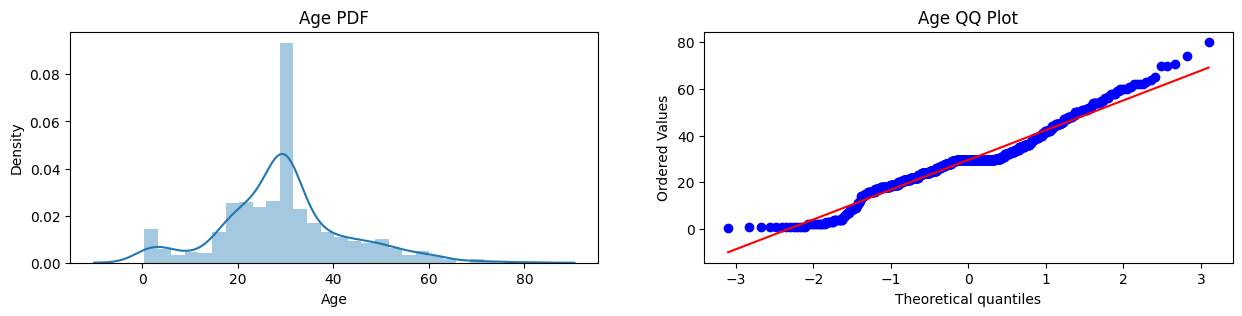

In [5]:
# Age Column 
plt.figure(figsize=(15, 3))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

Text(0.5, 1.0, 'Fare QQ Plot')

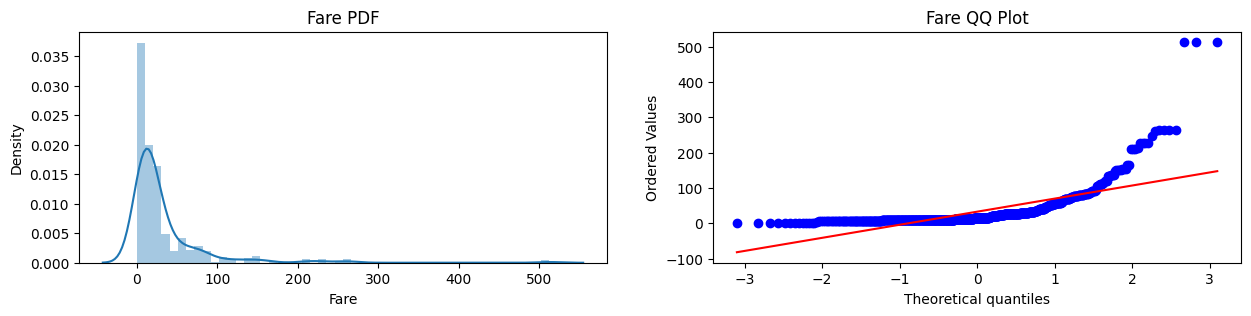

In [6]:
# Fare Column 
plt.figure(figsize=(15, 3))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')
# Right Skewed

In [7]:
trf = FunctionTransformer(np.log1p)
X_train_log = trf.fit_transform(X_train)
X_test_log = trf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_log, y_train)
y_pred = clf.predict(X_test_log)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}')

clf2 = DecisionTreeClassifier()
clf2.fit(X_train_log, y_train)
y_pred = clf2.predict(X_test_log)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}')

Logistic Regression Accuracy: 0.6815642458100558
Decision Tree Accuracy: 0.6815642458100558


In [8]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_log = trf2.fit_transform(X_train)
X_test_log = trf2.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_log, y_train)
y_pred = clf.predict(X_test_log)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}')

clf2 = DecisionTreeClassifier()
clf2.fit(X_train_log, y_train)
y_pred = clf2.predict(X_test_log)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}')

Logistic Regression Accuracy: 0.6703910614525139
Decision Tree Accuracy: 0.6536312849162011


#### <i>Square Transform</i> <br>
**Formula:** x′ = x^2

**Purpose:**
* Helps make skewed distributions more symmetric.
* Can amplify differences between small values.
* Used in feature engineering to create non-linear relationships.
* Used for data which is left skewed.
```python
from sklearn.preprocessing import PowerTransformer

# Create a square transformer
sqare_transformer = PowerTransformer(np.square)

##

## <span style="background-color: gray;">Power Transformer<span> 
### **Box-Cox Transformer**
=======================

The Box-Cox Transformer is a statistical technique used to transform non-normal dependent variables (target variables) into a more normally distributed shape. It is particularly useful for stabilizing variance, making the data more suitable for statistical modeling, especially in regression analysis where normality assumptions are important.

##### Box-Cox Transformation Formula : $$y(\lambda) = \begin{cases} \frac{y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\ \ln(y) & \text{if } \lambda = 0 \end{cases}$$ 

This is only applicables to the numbers <mark>greater than 0.</mark>
### **How Do Box-Cox Transformer Works**
=======================
```python
from sklearn.preprocessing import PowerTransformer

# Create a Box-Cox transformer
box_cox_transformer = PowerTransformer(method='box-cox')

# Fit and transform the data
transformed_data = box_cox_transformer.fit_transform(data)

In [9]:
import pandas as pd
import numpy  as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day31-power-transformer/concrete_data.csv')

X = df.drop('Strength', axis=1)
y = df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

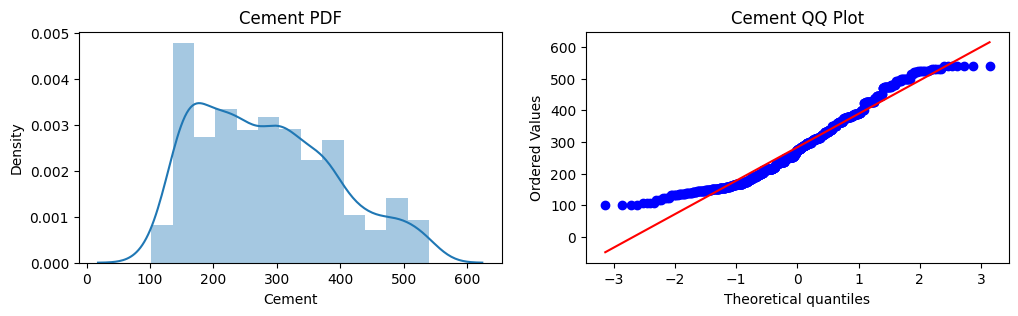

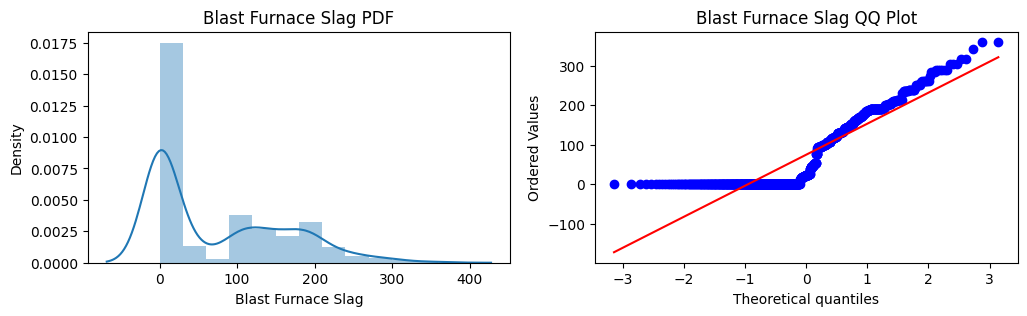

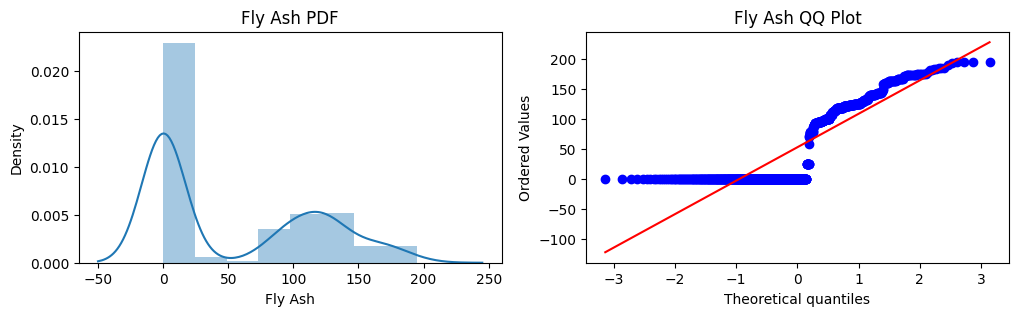

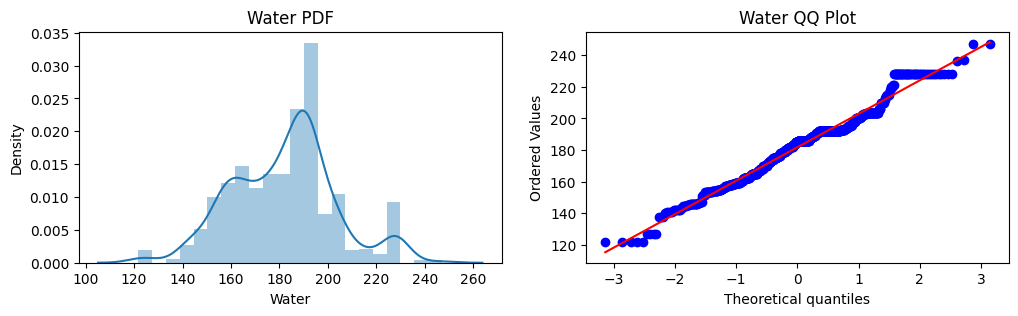

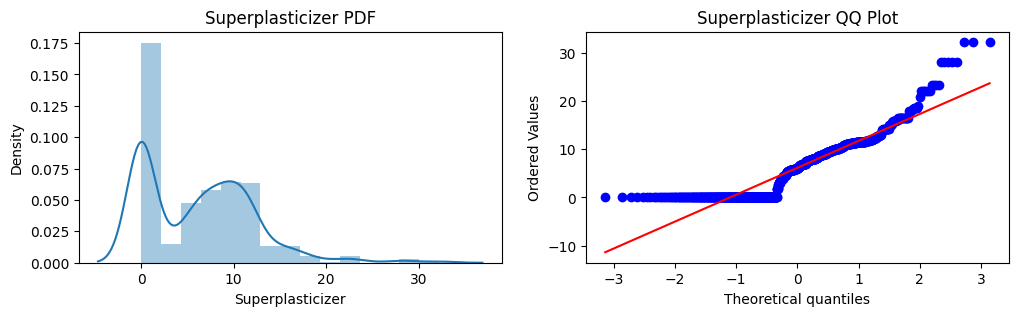

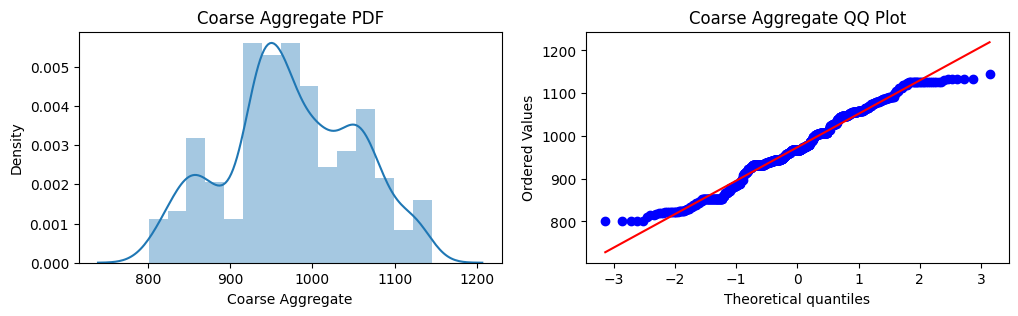

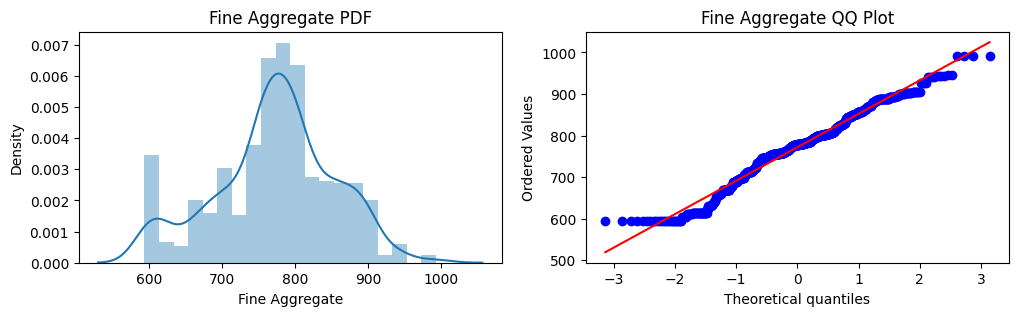

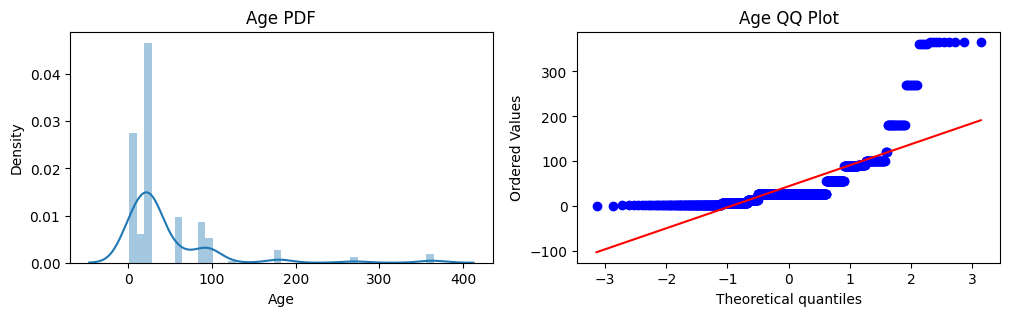

In [20]:

for col in X_train.columns:
    plt.figure(figsize=(12, 3))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(f'{col} PDF')

    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(f'{col} QQ Plot')
    plt.show()

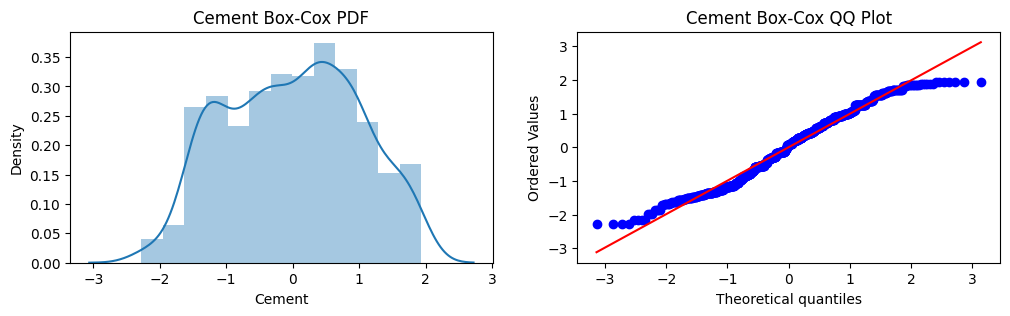

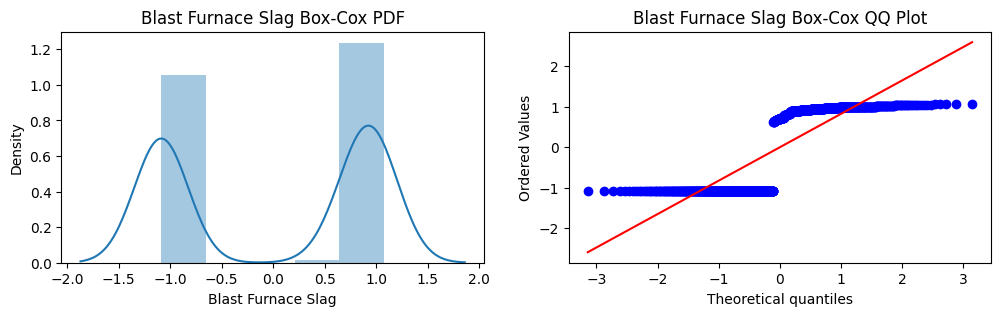

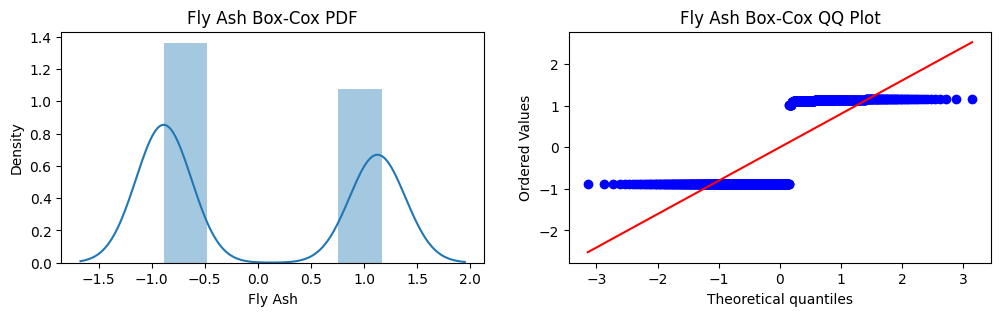

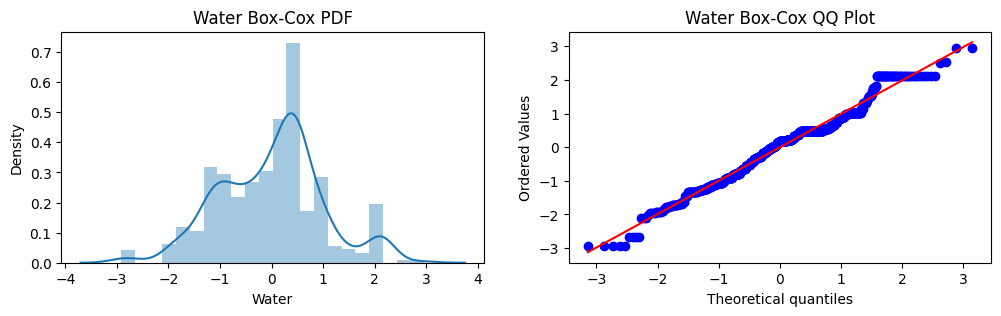

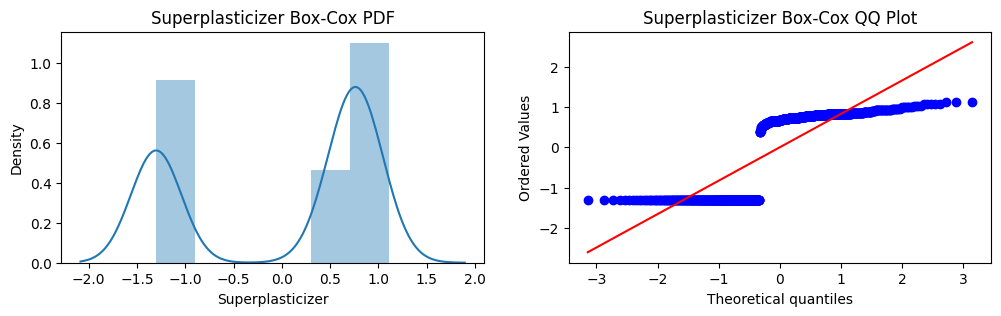

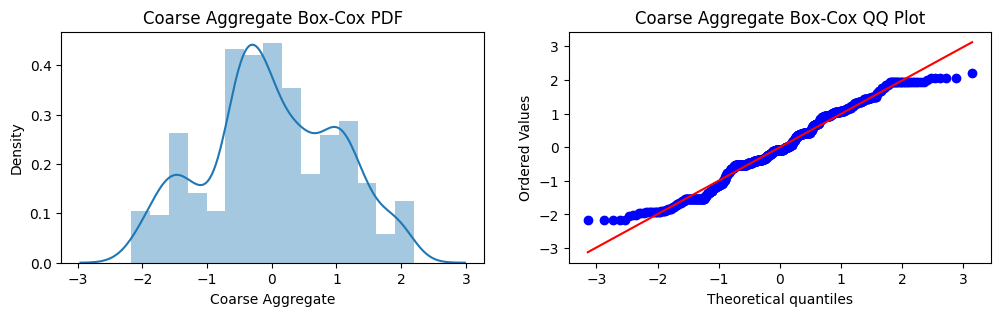

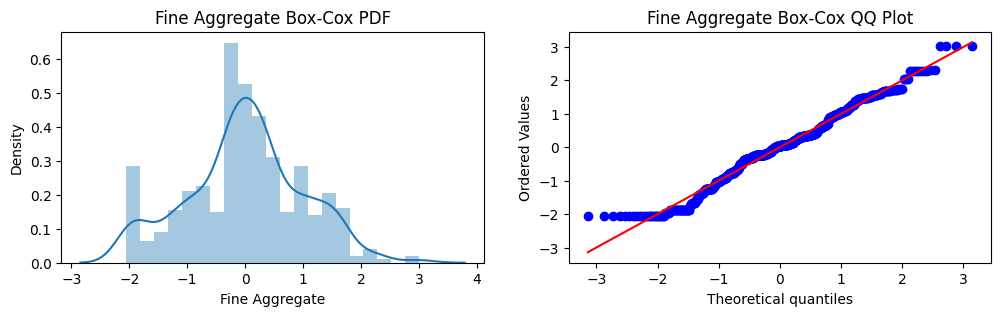

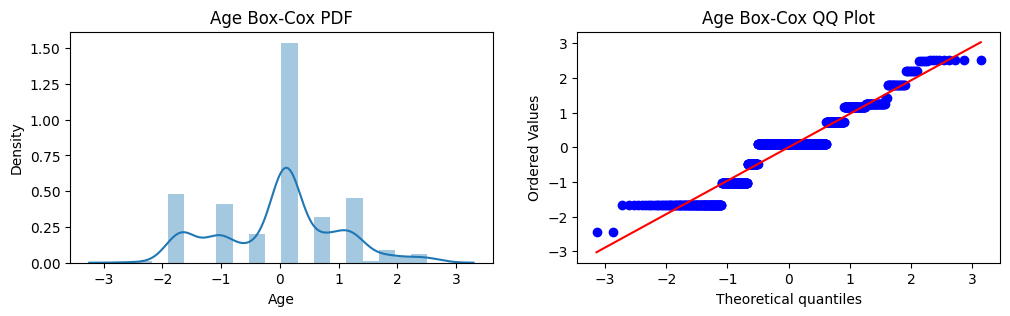

In [25]:
# Applying Box-Cox Power Transform
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')

X_train_pt = pt.fit_transform(X_train+0.000001)
X_test_pt = pt.transform(X_test+0.00001)

X_train_pt_df = pd.DataFrame(X_train_pt, columns=X_train.columns)
new_df = pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_})
new_df.head()
for col in X_train_pt_df.columns:
    plt.figure(figsize=(12, 3))
    plt.subplot(121)
    sns.distplot(X_train_pt_df[col])
    plt.title(f'{col} Box-Cox PDF')

    plt.subplot(122)
    stats.probplot(X_train_pt_df[col], dist='norm', plot=plt)
    plt.title(f'{col} Box-Cox QQ Plot')
    plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_pt, y_train)

y_pred2 = lr.predict(X_test_pt)
print(f'Linear Regression Coefficient of Determination: {r2_score(y_test, y_pred2)}')

Linear Regression Coefficient of Determination: 0.8079756386041388


#

 ### **Yeo-Johnson Transformer**
=======================

The Yeo-Johnson Transformer is a statistical technique used to transform non-normal dependent variables (target variables) into a more normally distributed shape. It is particularly useful for stabilizing variance, making the data more suitable for statistical modeling, especially in regression analysis where normality assumptions are important.

##### Yeo-Johnson Transformation Formula : $$y(\lambda) = \begin{cases} (y + 1)^\lambda - 1 & \text{if } y \geq 0 \\ -( (-y + 1)^\lambda - 1) & \text{if } y < 0 \end{cases}$$ 

This is applicable to all real numbers, including <mark>negative numbers.</mark>

### **How Do Yeo-Johnson Transformer Works**
=======================
```python
from sklearn.preprocessing import PowerTransformer

# Create a Yeo-Johnson transformer
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# Fit and transform the data
transformed_data = yeo_johnson_transformer.fit_transform(data)

In [13]:
# Apply Yeo-Johnson Power Transform
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

X_train_pt = pt.fit_transform(X_train+0.000001)
X_test_pt = pt.transform(X_test+0.00001)

pd.DataFrame({'cols': X_train.columns, 'yeo_johnson_lambdas': pt.lambdas_})

lr = LinearRegression()
lr.fit(X_train_pt, y_train)

y_pred2 = lr.predict(X_test_pt)
print(f'Linear Regression Coefficient of Determination: {r2_score(y_test, y_pred2)}')

Linear Regression Coefficient of Determination: 0.8161906591387493


## Quartile Transformer 

In [14]:
employee_data =      [
    {
      "id": 1,
      "name": "Joe",
      "salary": 85000,
      "departmentId": 1
    },
    {
      "id": 2,
      "name": "Henry",
      "salary": 80000,
      "departmentId": 2
    },
    {
      "id": 3,
      "name": "Sam",
      "salary": 60000,
      "departmentId": 2
    },
    {
      "id": 4,
      "name": "Max",
      "salary": 90000,
      "departmentId": 1
    },
    {
      "id": 5,
      "name": "Janet",
      "salary": 69000,
      "departmentId": 1
    },
    {
      "id": 6,
      "name": "Randy",
      "salary": 85000,
      "departmentId": 1
    },
    {
      "id": 7,
      "name": "Will",
      "salary": 70000,
      "departmentId": 1
    }
]

In [15]:
department_data = [
  {
    "id": 1,
    "name": "IT"
  },
  {
    "id": 2,
    "name": "Sales"
  }
]

In [16]:
import pandas as pd 
employee_df = pd.DataFrame(employee_data)
department_df = pd.DataFrame(department_data)

employee_df

,id,name,salary,departmentId
0,1,Joe,85000,1
1,2,Henry,80000,2
2,3,Sam,60000,2
3,4,Max,90000,1
4,5,Janet,69000,1
5,6,Randy,85000,1
6,7,Will,70000,1


In [17]:
department_df

,id,name
0,1,IT
1,2,Sales


In [18]:
import pandas as pd

def top_three_salaries(employee: pd.DataFrame, 
                       department: pd.DataFrame) -> pd.DataFrame:

    employee.  columns = ['id', 'Employee', 'Salary', 'd_id']
    department.columns = ['d_id', 'Department']

    employee['rnk'] = employee.groupby('d_id')[['Salary']
                             ].rank(method='dense', ascending=False)

    return employee[employee.rnk <= 3
                ].merge(department, on='d_id').iloc[:,[5,1,2]]